![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

<h1 style="color: #00BFFF;">00 | Data cleaning and wrangling</h1>

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

In [1]:
# 📚 Basic libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # 2D visualizations
import os # filemanagment
import seaborn as sns # high-resolution visualization

# 🤖 Machine Learning
from sklearn.preprocessing import StandardScaler # data normalization

# ⚙️ Settings
pd.set_option('display.max_columns', None)

# 🔄 Functions
import sys # system path to our functions
module = "C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/usefulness/easy"
sys.path.append(os.path.abspath(module))

from functions import open_data  # quick data overview
from functions import snake_columns  # snake_case
from functions import explore_data  # checks for duplicates, NaN & empty spaces

<h3 style="color: #008080;">1. We will start with removing outliers. 
    
* So far, we have discussed different methods to remove outliers.
* Use the one you feel more comfortable with, define a function for that.  
* Use the function to remove the outliers and apply it to the dataframe.
</h3>

In [51]:
file_path = os.path.join('C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-data-cleaning-and-wrangling/01_data/data.csv')
data = pd.read_csv(file_path)
snake_columns(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size


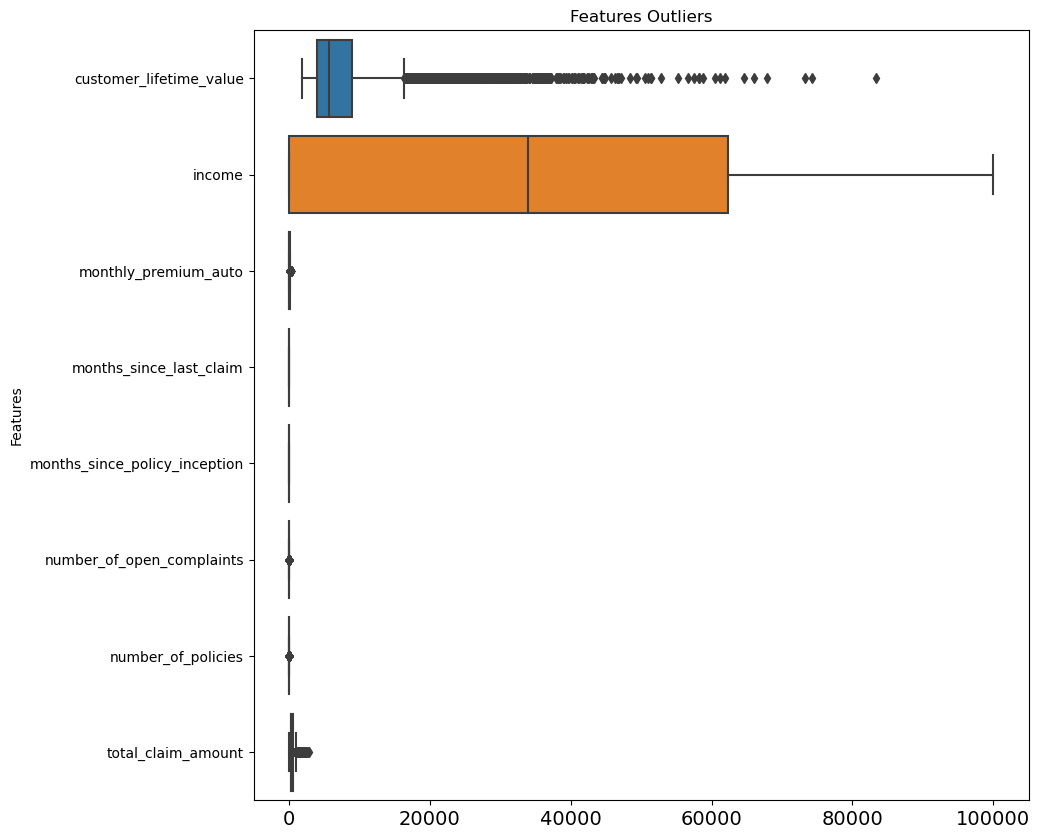

In [52]:
# Visualizing the Outliers

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=data, orient="h", ax=ax, showfliers=True, whis=1.5)

# Set the x-axis label
ax.set_ylabel("Features")
# Set the title of the plot
ax.set_title("Features Outliers")
# Adjust the font size of the x-axis ticks
ax.tick_params(axis='x', labelsize=14)
# Show the plot
plt.show()

In [4]:
def outlier_slayer(data): # automatically removes outliers based on Q1, Q3
    for column in data.select_dtypes(include=[np.number]):
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

In [5]:
data = outlier_slayer(data)

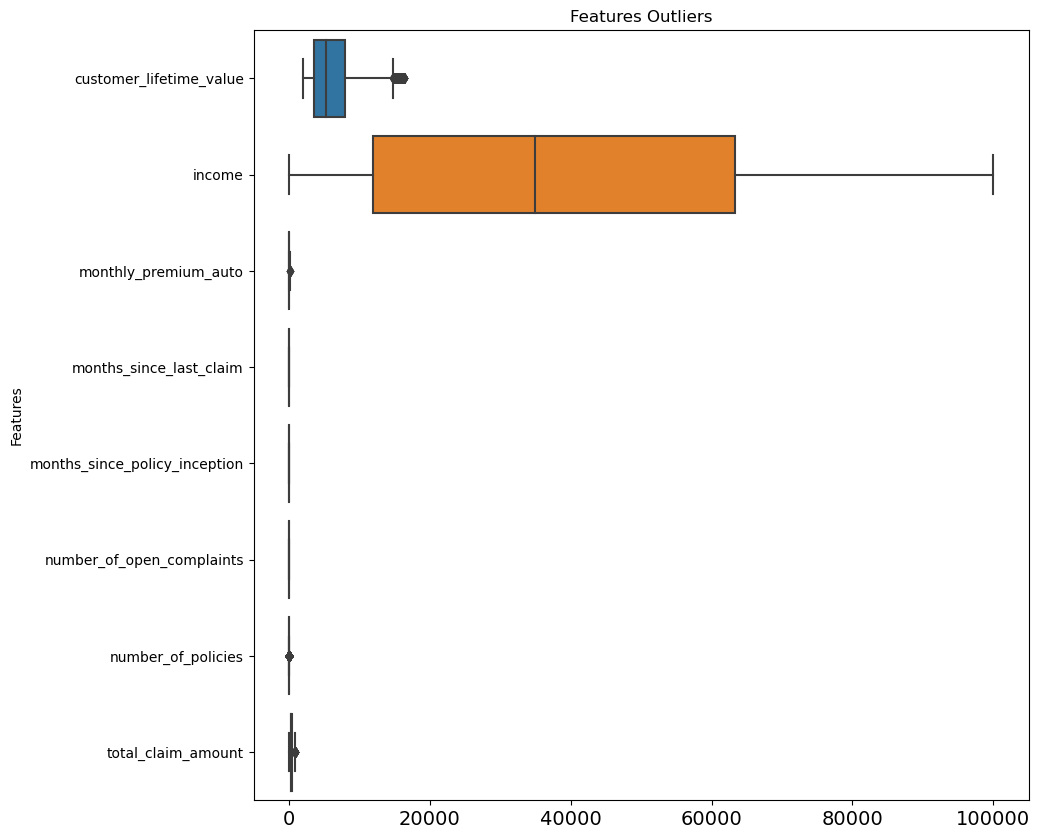

In [6]:
# Visualizing the Outliers

fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data=data, orient="h", ax=ax, showfliers=True, whis=1.5)

# Set the x-axis label
ax.set_ylabel("Features")
# Set the title of the plot
ax.set_title("Features Outliers")
# Adjust the font size of the x-axis ticks
ax.tick_params(axis='x', labelsize=14)
# Show the plot
plt.show()

<h3 style="color: #008080;">2. Create a copy of the dataframe for the data wrangling.</h3>

In [7]:
# Maybe better as first step
datac = data.copy()

<h3 style="color: #008080;">3. Normalize the continuous variables. You can use any one method you want.</h3>

In [8]:
n = datac.select_dtypes(include=[np.number])

In [9]:
n.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

In [10]:
n.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344


In [11]:
n_continous = n[['customer_lifetime_value', 'total_claim_amount']]

In [12]:
n_continous.head(3)

,customer_lifetime_value,total_claim_amount
0,2763.519279,384.811147
2,12887.431650,566.472247
3,7645.861827,529.881344


In [13]:
# Normalizing continous
scaler = StandardScaler()
n_sd = scaler.fit_transform(n_continous)

# Making it a dataframe
n_sd = pd.DataFrame(n_sd, columns=n_continous.columns)

In [14]:
n_sd.head(3)

,customer_lifetime_value,total_claim_amount
0,-1.047110,0.003709
1,2.144215,0.889556
2,0.491933,0.711125


<h3 style="color: #008080;">4. Encode the categorical variables</h3>

#### Selecting Categoricals

In [15]:
c = datac.select_dtypes(exclude=np.number)
c.head(5)

,customer,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
5,OC83172,Oregon,Yes,Basic,Bachelor,1/25/11,Employed,F,Rural,Married,Personal Auto,Personal L3,Offer2,Web,Two-Door Car,Medsize


#### Dropping unnecessary features

In [16]:
# We will drop `customer` since it's an ID
c = c.drop(['customer'], axis=1)

### Encoding Categoricals
* We will count `unique` for each feature.
* **If** it follows an hierarchy, ordinal encoding. **Elif**, manual encoding. **Elif** (too many uniques), get dummies. **Else** (dates), transform it to a datetime object and then create new columns for `day`, `month` & `year`

In [17]:
# One by one, we will check unique values to encode them manually if it's necessary
c['response'].unique()

array(['No', 'Yes'], dtype=object)

In [18]:
binary = {'No' : 0, 'Yes' : 1}
c['response'].replace(binary, inplace=True)

In [19]:
c['coverage'].unique()

array(['Basic', 'Premium', 'Extended'], dtype=object)

In [20]:
# In this case, ordinal encoding. Premium > Extended > Basic
ordinal = {'Basic' : 0, 'Extended' : 1, 'Premium' : 2}
c['coverage'].replace(ordinal, inplace=True)

In [21]:
c['education'].unique()

array(['Bachelor', 'Master', 'College', 'High School or Below', 'Doctor'],
      dtype=object)

In [22]:
# Then again, ordinal. Doctor > Master > College > Bachelor > High School or Below
ordinal = {'High School or Below' : 0, 'Bachelor' : 1, 'College' : 2, 'Master' : 3, 'Doctor' : 4}
c['education'].replace(ordinal, inplace=True)

In [23]:
c.head(3) # To see the changes

,state,response,coverage,education,effective_to_date,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,0,0,1,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
2,Nevada,0,2,1,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,0,0,1,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize


In [24]:
# Next, employmentstatus:
c['employmentstatus'].unique() # In this case, we will use get_dummies, since we don't want to represent a hierarchy

array(['Employed', 'Unemployed', 'Medical Leave', 'Disabled', 'Retired'],
      dtype=object)

In [25]:
c['gender'].unique() # We have two genders in this dataset, so get_dummies

array(['F', 'M'], dtype=object)

In [26]:
c['location_code'].unique() # Again, we don't want to show any hierarchy so we will use get_dummies

array(['Suburban', 'Rural', 'Urban'], dtype=object)

In [27]:
c['marital_status'].unique() # get_dummies

array(['Married', 'Single', 'Divorced'], dtype=object)

In [28]:
c['policy_type'].unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [29]:
# Then again, hierarchy. Special Auto > Corporate Auto > Personal Auto
ordinal = {'Personal Auto' : 0, 'Corporate Auto' : 1, 'Special Auto' : 2}
c['policy_type'].replace(ordinal, inplace=True)

In [30]:
c['policy'].unique() # get_dummies

array(['Corporate L3', 'Personal L3', 'Corporate L2', 'Personal L1',
       'Special L2', 'Personal L2', 'Corporate L1', 'Special L3',
       'Special L1'], dtype=object)

In [31]:
# Then again, hierarchy. Special L3 > Special L2 > Special L1 > Corporate L3 > Corporate L2 > Corporate L1 > Personal L3 > Personal L2 > Personal L1
ordinal = {'Personal L1' : 0, 'Personal L2' : 1, 'Personal L3': 2, 'Corporate L1' : 3, 'Corporate L2' : 4, 'Corporate L3' : 5, 'Special L1' : 6, 'Special L2' : 7, 'Special L3' : 8}
c['policy'].replace(ordinal, inplace=True)

In [32]:
c['renew_offer_type'].unique() # get_dummies, we don't know the hierarchy of the offers

array(['Offer1', 'Offer2', 'Offer3', 'Offer4'], dtype=object)

In [33]:
c['sales_channel'].unique() # get_dummies

array(['Agent', 'Call Center', 'Web', 'Branch'], dtype=object)

In [34]:
c['vehicle_class'].unique() # There is a clear hierarchy Luxury > Sports but not with the others. We will use get_dummies

array(['Two-Door Car', 'SUV', 'Four-Door Car', 'Sports Car'], dtype=object)

In [35]:
c['vehicle_size'].unique()

array(['Medsize', 'Small', 'Large'], dtype=object)

In [36]:
ordinal = {'Small' : 0, 'Medsize' : 1, 'Large': 2}
c['vehicle_size'].replace(ordinal, inplace=True)

<h3 style="color: #008080;">5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.</h3>

In [37]:
# Dates are complex. First, we will change it to datetime format
c['effective_to_date'] = c['effective_to_date'].astype('datetime64[ns]')

In [38]:
c['year'] = c['effective_to_date'].dt.year
c['month'] = c['effective_to_date'].dt.month
c['day'] = c['effective_to_date'].dt.day

In [39]:
# We now select all our categoricals encoded before applying get dummies
c_n = c.select_dtypes(include = np.number)
c_n.head(3)

,response,coverage,education,policy_type,policy,vehicle_size,year,month,day
0,0,0,1,1,5,1,2011,2,24
2,0,2,1,0,2,1,2011,2,19
3,0,0,1,1,4,1,2011,1,20


In [40]:
# We then drop `effective_to_date`
c = c.drop(['effective_to_date'], axis=1)

In [41]:
# Now, get_dummies
c_dumm = pd.get_dummies(c, drop_first=False)
c_dumm.sample(5)

,response,coverage,education,policy_type,policy,vehicle_size,year,month,day,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car
8305,0,1,2,0,2,0,2011,2,18,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0
2854,1,0,3,0,0,1,2011,1,16,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4882,0,1,2,0,1,1,2011,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
3225,1,1,2,1,4,0,2011,1,28,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1
5802,0,1,0,1,5,1,2011,1,6,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0


<h3 style="color: #008080;">6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.</h3>

In [46]:
result = pd.concat([c_dumm, c_n, n_sd], axis=1)

In [47]:
result.head(3)

,response,coverage,education,policy_type,policy,vehicle_size,year,month,day,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,employmentstatus_Medical Leave,employmentstatus_Retired,employmentstatus_Unemployed,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,response,coverage,education,policy_type,policy,vehicle_size,year,month,day,customer_lifetime_value,total_claim_amount
0,0.0,0.0,1.0,1.0,5.0,1.0,2011.0,2.0,24.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,1.0,2011.0,2.0,24.0,-1.047110,0.003709
2,0.0,2.0,1.0,0.0,2.0,1.0,2011.0,2.0,19.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0,0.0,2.0,1.0,2011.0,2.0,19.0,0.491933,0.711125
3,0.0,0.0,1.0,1.0,4.0,1.0,2011.0,1.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,1.0,2011.0,1.0,20.0,-1.031295,-1.199195


In [50]:
result.to_csv('C:/Users/apisi/01. IronData/01. GitHub/01. IronLabs/unit_4_py/lab-comparing-regression-models/01_data/result.csv')